In [ ]:
%matplotlib inline

In [3]:
from utils.plotting import plot_hist_simple, plot_scatter_simple, _plot_element
import pickle
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [5]:
data_dir = '../data/mortality_181108/'
measurement_dirname = '181108'

In [6]:
x = pd.read_csv(
    '../data/mortality_181108/181108/19527_episode1_timeseries.csv')
print(x.columns)

Index(['Unnamed: 0', 'Hours', 'Alanine aminotransferase', 'Albumin',
       'Alkaline phosphate', 'Anion gap', 'Asparate aminotransferase',
       'BIlirubin (urine dip)', 'Bacteria (urine)', 'Basophils', 'Bicarbonate',
       'Bilirubin (conjugated)', 'Bilirubin (total)', 'Blood urea nitrogen',
       'CO2 (ETCO2, PCO2, etc.)', 'Calcium (total)', 'Calcium ionized',
       'Chloride (blood)', 'Chloride (urine)', 'Cholesterol (HDL)',
       'Cholesterol (total)', 'Creatine kinase', 'Creatinine (blood)',
       'Creatinine (urine)', 'Diastolic blood pressure', 'Eosinophils',
       'Epithelial cells (urine)', 'Fraction inspired oxygen',
       'Glascow coma scale total', 'Glucose (blood)', 'Glucose (urine)',
       'Heart Rate', 'Hematocrit', 'Hemoglobin', 'Ketone (urine)', 'Lactate',
       'Lactate dehydrogenase', 'Lactic acid', 'Leukocytes (urine)',
       'Lymphocytes', 'Lymphocytes (atypical)', 'Macrocytes', 'Magnesium',
       'Mean blood pressure', 'Mean corpuscular hemoglobin', '

In [7]:
x.head(10)

,Unnamed: 0,Hours,Alanine aminotransferase,Albumin,Alkaline phosphate,Anion gap,Asparate aminotransferase,BIlirubin (urine dip),Bacteria (urine),Basophils,...,Temperature (C),Temperature (F),Troponin-I,Troponin-T,Urobilinogen (urine),White blood cell count (blood),White blood cell count (urine),Yeast (urine),pH (blood),pH (urine)
0,0,-74.021944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,-70.021944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,-63.621944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,5.0,NaN,NaN,5.0
3,3,-62.721944,16.0,4.1,78.0,12.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.1,NaN,NaN,NaN,NaN
4,4,-49.805278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,-22.888611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,0.411389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.35,NaN
7,7,3.928056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.41,NaN
8,8,5.094722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.37,NaN
9,9,6.128056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.32,NaN


In [8]:
x.count()

Unnamed: 0                            54
Hours                                 54
Alanine aminotransferase               2
Albumin                                1
Alkaline phosphate                     1
Anion gap                              7
Asparate aminotransferase              2
BIlirubin (urine dip)                  0
Bacteria (urine)                       0
Basophils                              0
Bicarbonate                            7
Bilirubin (conjugated)                 0
Bilirubin (total)                      1
Blood urea nitrogen                   10
CO2 (ETCO2, PCO2, etc.)                6
Calcium (total)                        1
Calcium ionized                        6
Chloride (blood)                       7
Chloride (urine)                       0
Cholesterol (HDL)                      0
Cholesterol (total)                    0
Creatine kinase                        0
Creatinine (blood)                    10
Creatinine (urine)                     0
Diastolic blood 

In [9]:
listfile_df = pd.read_csv('../data/mortality_181108/listfile.csv')
print(listfile_df.columns)

Index(['Unnamed: 0', 'Age', 'Deathtime', 'Episode', 'Ethnicity', 'Gender',
       'Height', 'Icustay', 'Intime', 'Length of Stay', 'Mortality', 'Outtime',
       'Real Death Hours', 'Subject', 'Weight'],
      dtype='object')


In [10]:
listfile_df.tail(10)

,Unnamed: 0,Age,Deathtime,Episode,Ethnicity,Gender,Height,Icustay,Intime,Length of Stay,Mortality,Outtime,Real Death Hours,Subject,Weight
41846,41846,75.802600,NaN,episode1_timeseries.csv,4,2,NaN,258288,2166-06-05 22:46:18,45.3336,0,2166-06-07 20:06:20,NaN,54979,NaN
41847,41847,90.000000,NaN,episode1_timeseries.csv,2,1,NaN,268977,2184-08-13 14:15:21,55.0632,0,2184-08-15 21:19:07,NaN,58296,NaN
41848,41848,80.810540,NaN,episode1_timeseries.csv,4,1,NaN,206887,2149-05-07 20:20:05,21.7056,0,2149-05-08 18:02:29,NaN,71493,NaN
41849,41849,90.000000,NaN,episode1_timeseries.csv,4,1,NaN,249616,2112-09-29 16:50:55,24.4176,0,2112-09-30 17:15:56,NaN,95854,NaN
41850,41850,76.048576,2145-06-09 03:45:00,episode2_timeseries.csv,4,1,NaN,227415,2145-05-22 17:31:22,143.7480,1,2145-05-28 17:16:19,418.227222,16178,NaN
41851,41851,80.273469,NaN,episode1_timeseries.csv,4,1,NaN,281774,2193-07-29 19:35:13,21.5544,0,2193-07-30 17:08:26,NaN,27792,NaN
41852,41852,65.114380,NaN,episode1_timeseries.csv,5,2,NaN,209955,2197-04-10 17:58:17,75.7200,0,2197-04-13 21:41:27,NaN,23434,NaN
41853,41853,79.629001,NaN,episode1_timeseries.csv,4,1,NaN,260890,2112-05-21 14:03:07,244.6920,0,2112-05-31 18:44:42,NaN,77195,NaN
41854,41854,77.276793,NaN,episode1_timeseries.csv,4,1,NaN,207406,2173-05-26 00:42:15,112.2408,0,2173-05-30 16:56:42,NaN,71507,NaN
41855,41855,76.875071,NaN,episode1_timeseries.csv,0,2,NaN,295886,2156-12-15 09:37:17,108.0672,0,2156-12-19 21:41:22,NaN,1890,NaN


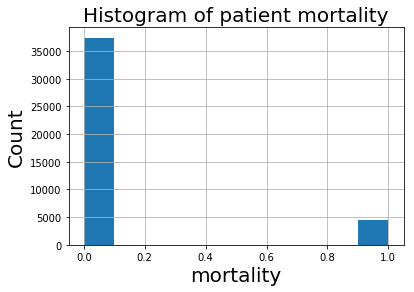

non-dead vs dead: 4423 37433


In [11]:
plot_hist_simple(listfile_df['Mortality'], xlabel='mortality', ylabel='Count',
                title='Histogram of patient mortality')
print(f'non-dead vs dead: {np.sum(listfile_df["Mortality"])}', 
      f'{len(listfile_df)  - np.sum(listfile_df["Mortality"])}')

Age mean/std: 63.824237931740754/17.367595933305488


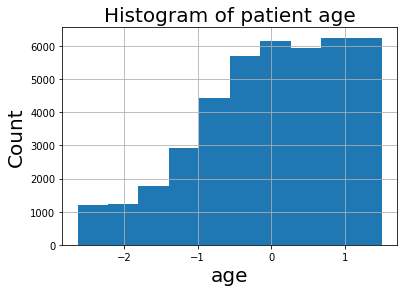

In [12]:
age_mean = np.mean(listfile_df['Age'])
age_std = np.std(listfile_df['Age'])
print('Age mean/std: {}/{}'.format(age_mean, age_std))
listfile_df['Age'] = (listfile_df['Age'] - age_mean) / age_std
plot_hist_simple(listfile_df['Age'], xlabel='age', ylabel='Count', 
                title='Histogram of patient age')

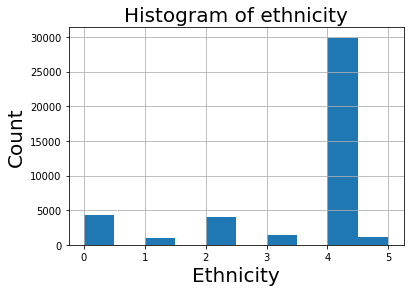

In [13]:
plot_hist_simple(listfile_df['Ethnicity'], xlabel='Ethnicity', ylabel='Count',
                title='Histogram of ethnicity')

In [21]:
num_ethnicity_group = len(listfile_df['Ethnicity'].unique())
print('num_ethnicity_group:', num_ethnicity_group)

num_ethnicity_group: 6


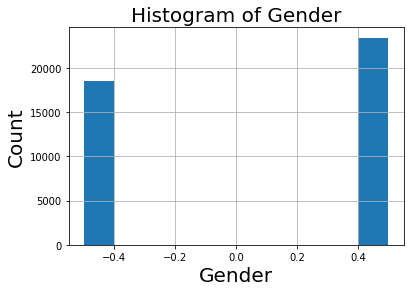

In [22]:
listfile_df['Gender'] = listfile_df['Gender'] - 1.5
plot_hist_simple(listfile_df['Gender'], xlabel='Gender', ylabel='Count',
                title='Histogram of Gender')

In [23]:
listfile_df['Height'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Height, dtype: float64

In [24]:
listfile_df['Weight'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Weight, dtype: float64

## Collect time-invariant data

In [15]:
time_inv_features = listfile_df[['Icustay', 'Mortality', 'Age', 'Ethnicity', 'Gender']]
pickle.dump(time_inv_features, 
            open('../data/in_hospital_mortality_181111/time_inv_features.pkl', 'wb'))

In [27]:
time_inv_features = pickle.load(open('../data/in_hospital_mortality_181111/time_inv_features.pkl', 'rb'))

In [28]:
time_inv_features = time_inv_features.rename(index=str, columns={'Icustay': 'icustay_id'})

In [29]:
one_hot = pd.get_dummies(time_inv_features['Ethnicity'], prefix='Ethnicity')
time_inv_features = time_inv_features.drop('Ethnicity', axis=1).join(one_hot)

In [30]:
time_inv_features.head(5)

,icustay_id,Mortality,Age,Gender,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,Ethnicity_5
0,237954,0,-0.625219,-0.5,0,0,0,0,1,0
1,287104,0,1.174265,-0.5,1,0,0,0,0,0
2,288251,0,-0.506855,-0.5,0,0,0,0,1,0
3,286792,0,1.194333,-0.5,0,0,0,0,1,0
4,284453,0,1.315226,-0.5,0,0,0,0,1,0


In [31]:
paitnet_info = pd.read_csv('/h/maimingj/projects/autodiagnosis/data/mortality_181108/elixhauser_ahrq.csv')

In [32]:
paitnet_info.head(5)

,subject_id,hadm_id,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,peripheral_vascular,hypertension,paralysis,other_neurological,...,obesity,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression,icustay_id
0,58526,100001,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,275225.0
1,54610,100003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,209281.0
2,9895,100006,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,291788.0
3,23018,100007,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,533,100009,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,253656.0


In [33]:
time_inv_features = time_inv_features.merge(paitnet_info, on='icustay_id', how='inner')

In [37]:
time_inv_features = time_inv_features.drop(['hadm_id', 'subject_id'], axis=1)

In [38]:
time_inv_features.head(5)

,icustay_id,Mortality,Age,Gender,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,Ethnicity_5,...,coagulopathy,obesity,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression
0,237954,0,-0.625219,-0.5,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,287104,0,1.174265,-0.5,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,288251,0,-0.506855,-0.5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,286792,0,1.194333,-0.5,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,284453,0,1.315226,-0.5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
pickle.dump(time_inv_features, 
            open('../data/in_hospital_mortality_181111/time_inv_features.pkl', 'wb'))

In [40]:
time_inv_features.columns

Index(['icustay_id', 'Mortality', 'Age', 'Gender', 'Ethnicity_0',
       'Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3', 'Ethnicity_4',
       'Ethnicity_5', 'congestive_heart_failure', 'cardiac_arrhythmias',
       'valvular_disease', 'pulmonary_circulation', 'peripheral_vascular',
       'hypertension', 'paralysis', 'other_neurological', 'chronic_pulmonary',
       'diabetes_uncomplicated', 'diabetes_complicated', 'hypothyroidism',
       'renal_failure', 'liver_disease', 'peptic_ulcer', 'aids', 'lymphoma',
       'metastatic_cancer', 'solid_tumor', 'rheumatoid_arthritis',
       'coagulopathy', 'obesity', 'weight_loss', 'fluid_electrolyte',
       'blood_loss_anemia', 'deficiency_anemias', 'alcohol_abuse',
       'drug_abuse', 'psychoses', 'depression'],
      dtype='object')

## Collect time-series data

In [36]:
import time
from datetime import datetime as dt

def get_diff_time_by_hours(time1, time2):
    '''
    time1: '2018-02-11 16:33:43'
    time2: '2018-02-12 16:33:43'
    '''
    # Handle '2123-04-13' does not match format '%Y-%m-%d %H:%M:%S'
    if len(time1) == 10:
        time1 += ' 00:00:00'
    if len(time2) == 10:
        time2 += ' 00:00:00'

    a = dt.strptime(time1, '%Y-%m-%d %H:%M:%S')
    b = dt.strptime(time2, '%Y-%m-%d %H:%M:%S')

    diff = b - a
    hours = diff.days * 24
    hours += diff.seconds / 3600.
    return hours

def get_real_end_time(list_df, i):
    # get real end hour == min(outtime - intime, deathtime - intime)
    row_i = list_df.iloc[i]
    intime, deathtime, outtime = row_i['Intime'], row_i['Deathtime'], row_i['Outtime']
    rel_end_time = get_diff_time_by_hours(intime, outtime)

    if pd.notnull(deathtime):
        rel_deathtime = get_diff_time_by_hours(intime, deathtime)
        rel_end_time = min(rel_deathtime, rel_end_time)
    
    return rel_end_time

def get_sparse_coding_from_dataset(list_df,
                                   data_dir,
                                   measurement_dirname,
                                   max_encounters=-1):
    """ Max encounter == -1 => use all encounters """
    start_time = time.time()
    Ts, Ys, ind_ts, ind_fs, icustay_ids, all_labels, all_rel_end_time = [], [], [], [], [], [], []
    counts = {}
    idx_to_feature_name = {}
    feature_name_to_idx = {}
    if max_encounters == -1:
        max_encounters = len(list_df)

    for i in range(max_encounters):
        T, Y, ind_t, ind_f = [], [], [], []
        
        rel_end_time = get_real_end_time(list_df, i)
        
        # Process time-series meaasurement
        row_i = list_df.iloc[i]
        fname = '{}/{}/{}_{}'.format(data_dir, measurement_dirname, row_i['Subject'], row_i['Episode'])
        measurements = pd.read_csv(fname)

        ## Filter measurement before ICU entry time and ICU outtime/deathtime
        measurements = measurements[(measurements['Hours'] >= 0) &
                                    (measurements['Hours'] <= rel_end_time)].reset_index(drop=True)

        T = measurements['Hours'].tolist()
        for j, j_name in enumerate(list(measurements)[2:]):
            valid_measurements = measurements[pd.notnull(measurements[j_name])]
            if len(valid_measurements) > 0:
                Y += valid_measurements[j_name].tolist()
                ind_f += [j] * len(valid_measurements)
                ind_t += valid_measurements.index.tolist()
                if j_name in counts:
                    counts[j_name] += len(valid_measurements)
                else:
                    counts[j_name] = len(valid_measurements)
            
            if i == 0:
                feature_name_to_idx[j_name] = j
                idx_to_feature_name[j] = j_name
        
        if len(ind_t) > 0:
            Ts.append(T)
            Ys.append(Y)
            ind_ts.append(ind_t)
            ind_fs.append(ind_f)
            icustay_ids.append(row_i['Icustay'])
            all_rel_end_time.append(rel_end_time)
            all_labels.append(row_i['Mortality'])

        # progress report
        if i % 999 == 0:
            print('Finished {} / {}. Took {}s'.format(
                i, max_encounters, time.time() - start_time))
            
    return Ts, Ys, ind_ts, ind_fs, \
           icustay_ids, all_labels, all_rel_end_time, counts, \
           feature_name_to_idx, idx_to_feature_name

In [37]:
Ts, Ys, ind_ts, ind_fs, \
icustay_ids, all_labels, all_rel_end_time, counts,\
feature_name_to_idx, idx_to_feature_name =\
    get_sparse_coding_from_dataset(list_df=listfile_df,
                                   data_dir=data_dir, 
                                   measurement_dirname=measurement_dirname, 
                                   max_encounters=-1)

Finished 0 / 41856. Took 0.04824209213256836s
Finished 999 / 41856. Took 31.111477613449097s
Finished 1998 / 41856. Took 61.72272348403931s
Finished 2997 / 41856. Took 92.55265522003174s
Finished 3996 / 41856. Took 123.50077247619629s
Finished 4995 / 41856. Took 154.25394082069397s
Finished 5994 / 41856. Took 184.9075150489807s
Finished 6993 / 41856. Took 215.90108108520508s
Finished 7992 / 41856. Took 246.92123651504517s
Finished 8991 / 41856. Took 277.43847155570984s
Finished 9990 / 41856. Took 307.91349244117737s
Finished 10989 / 41856. Took 338.5082628726959s
Finished 11988 / 41856. Took 369.29212403297424s
Finished 12987 / 41856. Took 399.7506730556488s
Finished 13986 / 41856. Took 430.3201048374176s
Finished 14985 / 41856. Took 461.0890054702759s
Finished 15984 / 41856. Took 491.7975962162018s
Finished 16983 / 41856. Took 522.3813352584839s
Finished 17982 / 41856. Took 553.2137656211853s
Finished 18981 / 41856. Took 584.1394028663635s
Finished 19980 / 41856. Took 615.212821483612

In [38]:
counts

{'Anion gap': 213446,
 'Basophils': 25973,
 'Bicarbonate': 219802,
 'Blood urea nitrogen': 220854,
 'Calcium (total)': 185718,
 'Chloride (blood)': 225476,
 'Creatine kinase': 44459,
 'Creatinine (blood)': 221715,
 'Diastolic blood pressure': 3929753,
 'Eosinophils': 25973,
 'Epithelial cells (urine)': 12520,
 'Glascow coma scale total': 627577,
 'Glucose (blood)': 313798,
 'Heart Rate': 4204927,
 'Hematocrit': 253045,
 'Hemoglobin': 196859,
 'Lymphocytes': 25973,
 'Magnesium': 218030,
 'Mean blood pressure': 3904746,
 'Mean corpuscular hemoglobin': 194995,
 'Monocytes': 25973,
 'Neutrophils': 25973,
 'Phosphate': 189261,
 'Platelets': 205492,
 'Potassium': 241110,
 'Prothrombin time': 139231,
 'Red blood cell count (blood)': 194997,
 'Red blood cell count (urine)': 11039,
 'Sodium': 229893,
 'Systolic blood pressure': 3930869,
 'Temperature (C)': 797437,
 'Temperature (F)': 1116536,
 'Urobilinogen (urine)': 5839,
 'White blood cell count (blood)': 196268,
 'White blood cell count (uri

In [40]:
data_dict = {
    'icustay_ids': icustay_ids,
    'Ts': Ts,
    'Ys': Ys,
    'ind_ts': ind_ts,
    'ind_fs': ind_fs,
    'all_labels': all_labels,
    'all_rel_end_time': all_rel_end_time,
    'counts': counts,
    'feature_name_to_idx': feature_name_to_idx,
    'idx_to_feature_name': idx_to_feature_name
}

pickle.dump(data_dict, open('../data/in_hospital_mortality_181111/unnorm_time_var_features.pkl', 'wb'))

In [12]:
import pickle
data_dict = pickle.load(open('../data/in_hospital_mortality_181111/unnorm_time_var_features.pkl', 'rb'))
icustay_ids = data_dict['icustay_ids']
Ts = data_dict['Ts']
Ys = data_dict['Ys']
ind_ts = data_dict['ind_ts']
ind_fs = data_dict['ind_fs']
all_labels = data_dict['all_labels']
all_rel_end_time = data_dict['all_rel_end_time']

In [41]:
{k: len(data_dict[k]) for k in data_dict}

{'icustay_ids': 41744,
 'Ts': 41744,
 'Ys': 41744,
 'ind_ts': 41744,
 'ind_fs': 41744,
 'all_labels': 41744,
 'all_rel_end_time': 41744,
 'counts': 67,
 'feature_name_to_idx': 72,
 'idx_to_feature_name': 72}

## Aggregate features

In [46]:
del counts['Temperature (F)']

In [49]:
del idx_to_feature_name[feature_name_to_idx['Temperature (F)']]
del feature_name_to_idx['Temperature (F)']

In [50]:
aggregators = dict([(name, []) for name in counts])

In [51]:
# sum all the fields together. Get the summary statistics, then convert them again.
for Y, T, ind_f, ind_t in zip(Ys, Ts, ind_fs, ind_ts):
    for idx, (the_Y, the_ind_f) in enumerate(zip(Y, ind_f)):
        if the_Y < 0: # Should not have negative value
            continue
        
        if not the_ind_f in idx_to_feature_name:
            continue
        feature_name = idx_to_feature_name[the_ind_f]
        
        the_Y = np.log(0.1 + the_Y)
        
        aggregators[feature_name].append(the_Y)

## Filter low number measurement

In [52]:
all_len = [len(aggregators[k]) for k in aggregators]

In [53]:
max(all_len) 

4204926

In [54]:
size_threshold = 0.001
selected_aggregators = {k: aggregators[k] for k in aggregators if len(aggregators[k]) >= max(all_len) * size_threshold}  
selected_idx_to_feature_name = {feature_name_to_idx[k]: k for k in selected_aggregators}
print('Number of measurements per features after filetering by number')

print({k: len(aggregators[k]) for k in selected_aggregators})
print('Number of features left: {}'.format(len(selected_idx_to_feature_name)))

Number of measurements per features after filetering by number
{'Anion gap': 213442, 'Basophils': 25973, 'Bicarbonate': 219802, 'Blood urea nitrogen': 220854, 'Calcium (total)': 185718, 'Chloride (blood)': 225476, 'Creatine kinase': 44459, 'Creatinine (blood)': 221715, 'Diastolic blood pressure': 3929745, 'Eosinophils': 25973, 'Epithelial cells (urine)': 12520, 'Glascow coma scale total': 627577, 'Glucose (blood)': 313798, 'Heart Rate': 4204926, 'Hematocrit': 253045, 'Hemoglobin': 196859, 'Lymphocytes': 25973, 'Magnesium': 218030, 'Mean blood pressure': 3904218, 'Mean corpuscular hemoglobin': 194995, 'Monocytes': 25973, 'Neutrophils': 25973, 'Phosphate': 189261, 'Platelets': 205492, 'Potassium': 241110, 'Prothrombin time': 139231, 'Red blood cell count (blood)': 194997, 'Red blood cell count (urine)': 11039, 'Sodium': 229893, 'Systolic blood pressure': 3930865, 'Temperature (C)': 797435, 'Urobilinogen (urine)': 5839, 'White blood cell count (blood)': 196268, 'White blood cell count (ur

In [55]:
size_threshold = 0.005
selected_aggregators = {k: aggregators[k] for k in aggregators if len(aggregators[k]) >= max(all_len) * size_threshold}  
selected_idx_to_feature_name = {feature_name_to_idx[k]: k for k in selected_aggregators}
print('Number of measurements per features after filetering by number')

print({k: len(aggregators[k]) for k in selected_aggregators})
print('Number of features left: {}'.format(len(selected_idx_to_feature_name)))

Number of measurements per features after filetering by number
{'Anion gap': 213442, 'Basophils': 25973, 'Bicarbonate': 219802, 'Blood urea nitrogen': 220854, 'Calcium (total)': 185718, 'Chloride (blood)': 225476, 'Creatine kinase': 44459, 'Creatinine (blood)': 221715, 'Diastolic blood pressure': 3929745, 'Eosinophils': 25973, 'Glascow coma scale total': 627577, 'Glucose (blood)': 313798, 'Heart Rate': 4204926, 'Hematocrit': 253045, 'Hemoglobin': 196859, 'Lymphocytes': 25973, 'Magnesium': 218030, 'Mean blood pressure': 3904218, 'Mean corpuscular hemoglobin': 194995, 'Monocytes': 25973, 'Neutrophils': 25973, 'Phosphate': 189261, 'Platelets': 205492, 'Potassium': 241110, 'Prothrombin time': 139231, 'Red blood cell count (blood)': 194997, 'Sodium': 229893, 'Systolic blood pressure': 3930865, 'Temperature (C)': 797435, 'White blood cell count (blood)': 196268, 'pH (urine)': 23972, 'CO2 (ETCO2, PCO2, etc.)': 263161, 'Oxygen saturation': 101518, 'Partial pressure of carbon dioxide': 263153, 

In [56]:
size_threshold = 0.01
selected_aggregators = {k: aggregators[k] for k in aggregators if len(aggregators[k]) >= max(all_len) * size_threshold}  
selected_idx_to_feature_name = {feature_name_to_idx[k]: k for k in selected_aggregators}
print('Number of measurements per features after filetering by number')

print({k: len(aggregators[k]) for k in selected_aggregators})
print('Number of features left: {}'.format(len(selected_idx_to_feature_name)))

Number of measurements per features after filetering by number
{'Anion gap': 213442, 'Bicarbonate': 219802, 'Blood urea nitrogen': 220854, 'Calcium (total)': 185718, 'Chloride (blood)': 225476, 'Creatine kinase': 44459, 'Creatinine (blood)': 221715, 'Diastolic blood pressure': 3929745, 'Glascow coma scale total': 627577, 'Glucose (blood)': 313798, 'Heart Rate': 4204926, 'Hematocrit': 253045, 'Hemoglobin': 196859, 'Magnesium': 218030, 'Mean blood pressure': 3904218, 'Mean corpuscular hemoglobin': 194995, 'Phosphate': 189261, 'Platelets': 205492, 'Potassium': 241110, 'Prothrombin time': 139231, 'Red blood cell count (blood)': 194997, 'Sodium': 229893, 'Systolic blood pressure': 3930865, 'Temperature (C)': 797435, 'White blood cell count (blood)': 196268, 'CO2 (ETCO2, PCO2, etc.)': 263161, 'Oxygen saturation': 101518, 'Partial pressure of carbon dioxide': 263153, 'Partial thromboplastin time': 149675, 'pH (blood)': 285076, 'Bilirubin (total)': 47707, 'Lactate': 84510, 'Lactic acid': 89347

In [57]:
for k in selected_aggregators:
    print(k, '&', len(selected_aggregators[k]), '&',
          np.round(len(selected_aggregators[k]) / max(all_len), 3), '\\\\')
##print({k: np.round(len(aggregators[k]) / max(all_len), 3)  for k in aggregators})

Anion gap & 213442 & 0.051 \\
Bicarbonate & 219802 & 0.052 \\
Blood urea nitrogen & 220854 & 0.053 \\
Calcium (total) & 185718 & 0.044 \\
Chloride (blood) & 225476 & 0.054 \\
Creatine kinase & 44459 & 0.011 \\
Creatinine (blood) & 221715 & 0.053 \\
Diastolic blood pressure & 3929745 & 0.935 \\
Glascow coma scale total & 627577 & 0.149 \\
Glucose (blood) & 313798 & 0.075 \\
Heart Rate & 4204926 & 1.0 \\
Hematocrit & 253045 & 0.06 \\
Hemoglobin & 196859 & 0.047 \\
Magnesium & 218030 & 0.052 \\
Mean blood pressure & 3904218 & 0.928 \\
Mean corpuscular hemoglobin & 194995 & 0.046 \\
Phosphate & 189261 & 0.045 \\
Platelets & 205492 & 0.049 \\
Potassium & 241110 & 0.057 \\
Prothrombin time & 139231 & 0.033 \\
Red blood cell count (blood) & 194997 & 0.046 \\
Sodium & 229893 & 0.055 \\
Systolic blood pressure & 3930865 & 0.935 \\
Temperature (C) & 797435 & 0.19 \\
White blood cell count (blood) & 196268 & 0.047 \\
CO2 (ETCO2, PCO2, etc.) & 263161 & 0.063 \\
Oxygen saturation & 101518 & 0.024 \

In [77]:
temp_lst = [len(aggregators[k]) for k in selected_aggregators]
temp_lst.sort()
temp_lst

[44459,
 45809,
 46808,
 46850,
 47707,
 53689,
 84510,
 89347,
 101518,
 139231,
 140283,
 149675,
 185718,
 189261,
 194995,
 194997,
 196268,
 196859,
 205492,
 213442,
 218030,
 219802,
 220854,
 221715,
 225476,
 229893,
 241110,
 253045,
 263153,
 263161,
 285076,
 313798,
 375335,
 627577,
 797435,
 3904218,
 3929745,
 3930865,
 4204926]

In [55]:
size_threshold = 0.05
selected_aggregators = {k: aggregators[k] for k in aggregators if len(aggregators[k]) >= max(all_len) * size_threshold}  
selected_idx_to_feature_name = {feature_name_to_idx[k]: k for k in selected_aggregators}
print('Number of measurements per features after filetering by number')

print({k: len(aggregators[k]) for k in selected_aggregators})
print('Number of features left: {}'.format(len(selected_idx_to_feature_name)))

Number of measurements per features after filetering by number
{'Alkaline phosphate': 213442, 'Basophils': 219802, 'Bilirubin (total)': 220854, 'Blood urea nitrogen': 263161, 'Calcium ionized': 225476, 'Creatine kinase': 221715, 'Creatinine (urine)': 3929745, 'Epithelial cells (urine)': 375335, 'Fraction inspired oxygen': 627577, 'Glascow coma scale total': 313798, 'Glucose (urine)': 4204926, 'Heart Rate': 253045, 'Macrocytes': 218030, 'Magnesium': 3904218, 'Oxygen saturation': 263153, 'Positive end-expiratory pressure': 241110, 'Red blood cell count (urine)': 229893, 'Sodium': 3930865, 'Systolic blood pressure': 797435, 'Temperature (C)': 1116295, 'Yeast (urine)': 285076}
Number of features left: 21


In [51]:
size_threshold = 0.1
selected_aggregators = {k: aggregators[k] for k in aggregators if len(aggregators[k]) >= max(all_len) * size_threshold}  
selected_idx_to_feature_name = {feature_name_to_idx[k]: k for k in selected_aggregators}
print('Number of measurements per features after filetering by number')

print({k: len(aggregators[k]) for k in selected_aggregators})
print('Number of features left: {}'.format(len(selected_idx_to_feature_name)))

Number of measurements per features after filetering by number
{'Creatinine (urine)': 3929745, 'Fraction inspired oxygen': 627577, 'Glucose (urine)': 4204926, 'Magnesium': 3904218, 'Sodium': 3930865, 'Systolic blood pressure': 797435, 'Temperature (C)': 1116295}
Number of features left: 7


## Calculate stats for removing outliers and normalizing

In [58]:
upperbound_dict, lowerbound_dict, mean_dict, std_dict = {}, {}, {}, {}

for k in selected_aggregators:
    tmp = np.array(selected_aggregators[k])
    
    IQR = np.percentile(tmp, 75) - np.percentile(tmp, 25)
    median = np.percentile(tmp, 50)
    
    upperbound_dict[k] = median + 4.5 * IQR
    lowerbound_dict[k] = median - 4.5 * IQR
    
    tmp = tmp[tmp < upperbound_dict[k]]
    tmp = tmp[tmp > lowerbound_dict[k]]
    
    mean_dict[k] = np.mean(tmp)
    std_dict[k] = np.std(tmp)

## Visualize historgram of feature after removing outlier

In [59]:
from scipy.stats import kurtosistest

In [60]:
for k in selected_aggregators:
    tmp = np.array(selected_aggregators[k])
    tmp = tmp[tmp >= lowerbound_dict[k]]
    tmp = tmp[tmp <= upperbound_dict[k]]
    print(k, kurtosistest(tmp))

Anion gap KurtosistestResult(statistic=64.93340806339195, pvalue=0.0)


KeyError: 'Basophils'

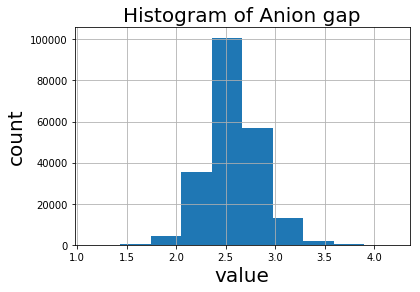

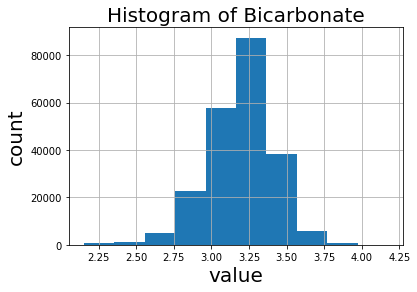

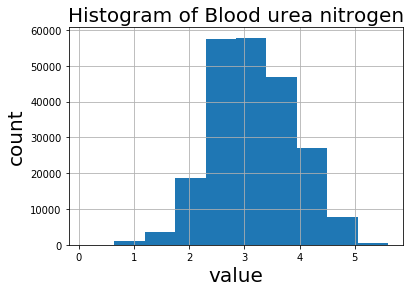

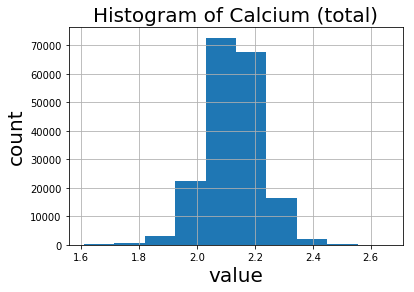

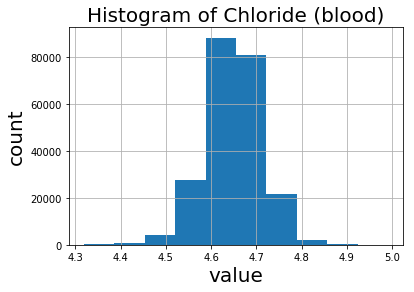

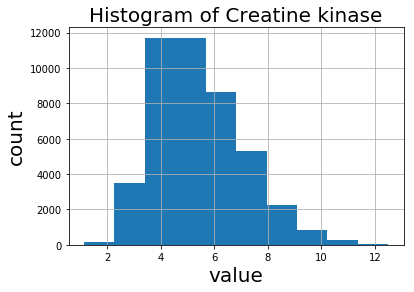

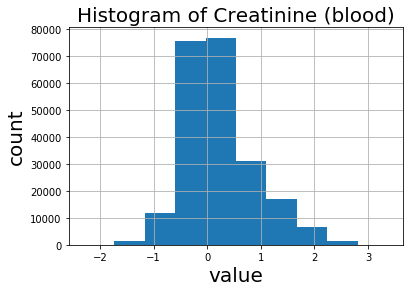

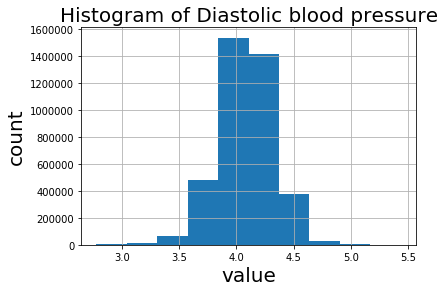

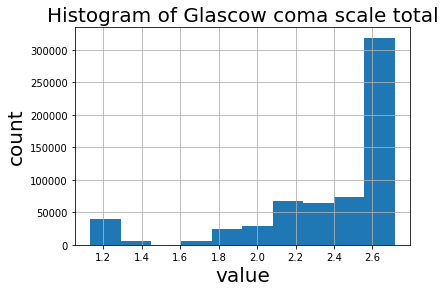

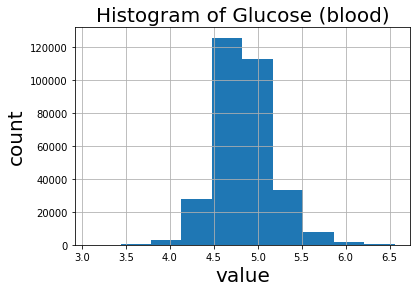

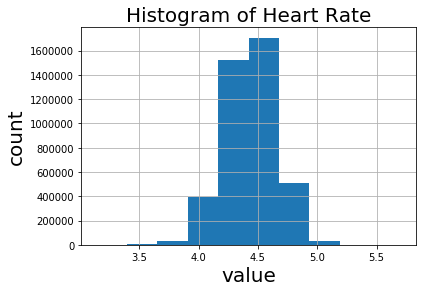

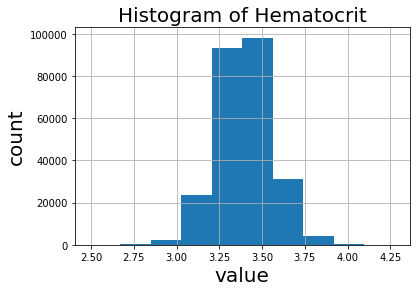

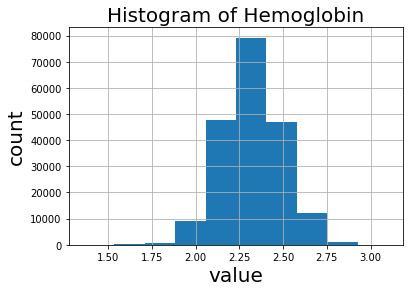

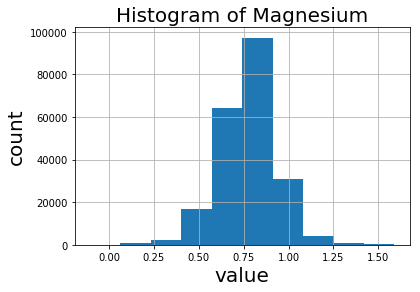

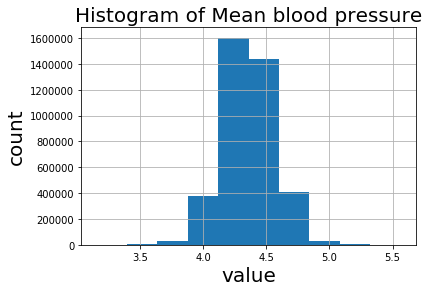

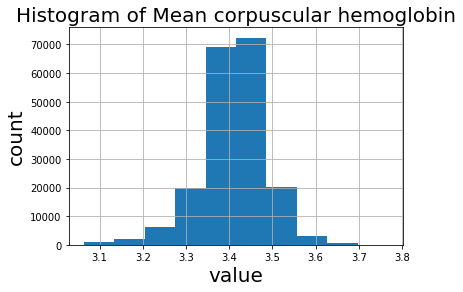

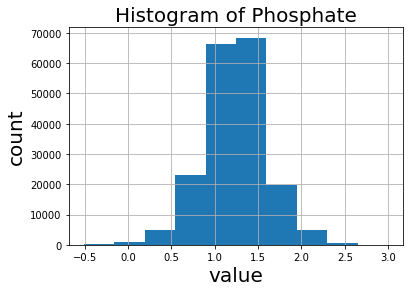

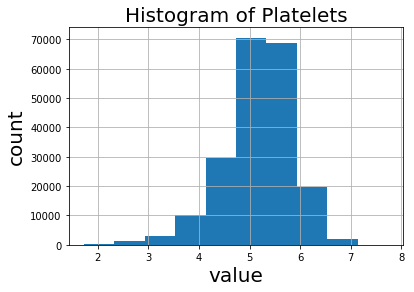

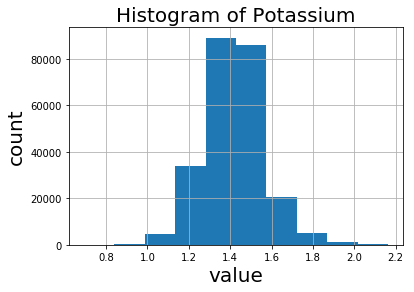

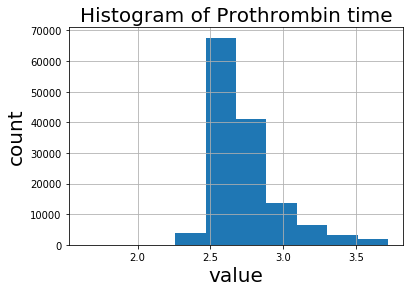

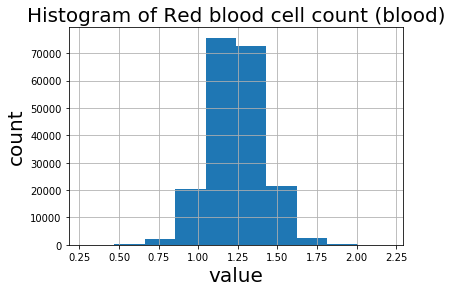

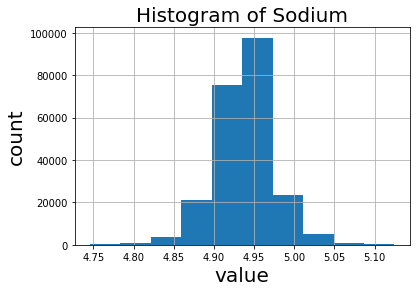

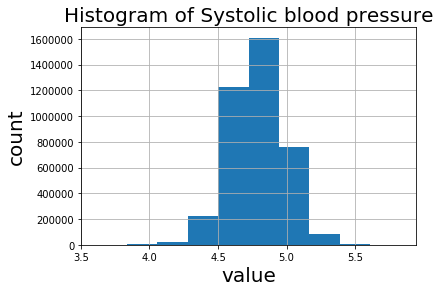

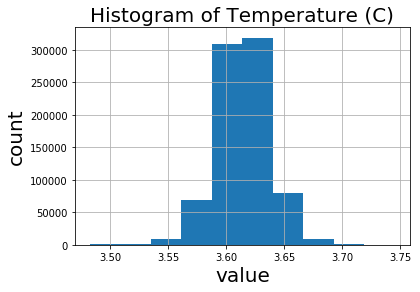

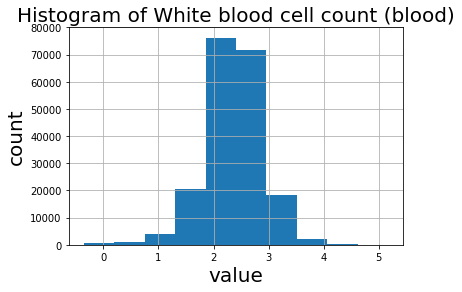

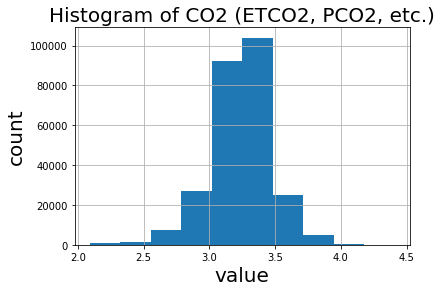

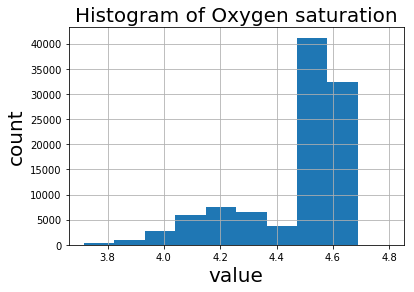

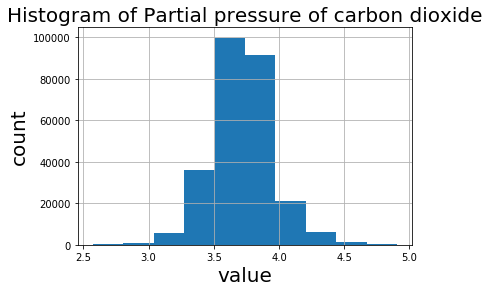

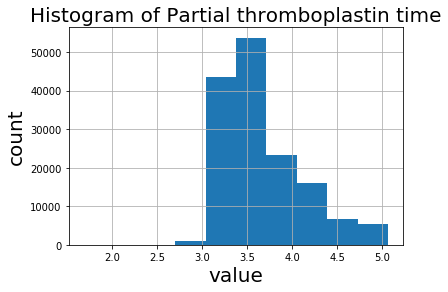

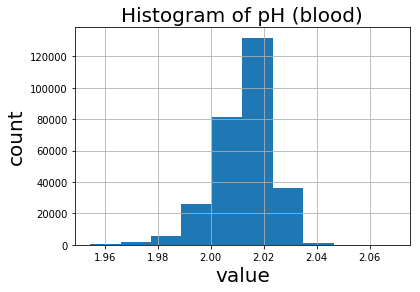

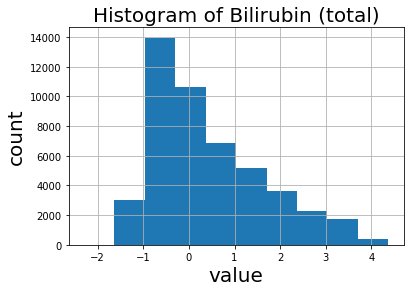

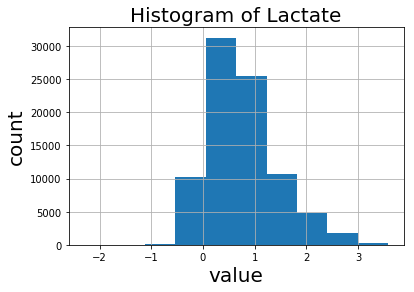

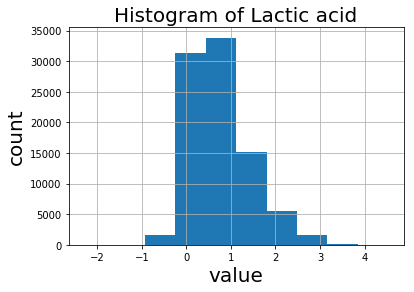

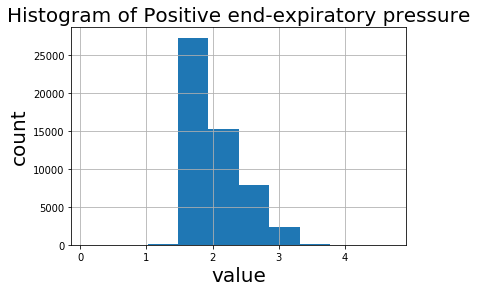

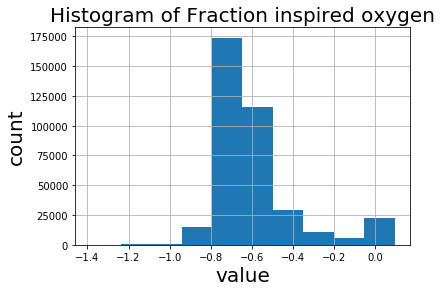

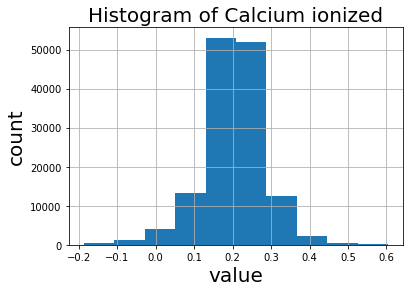

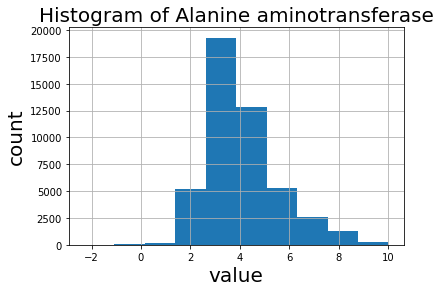

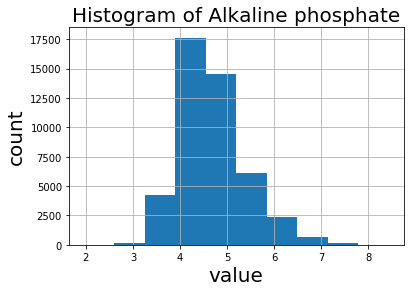

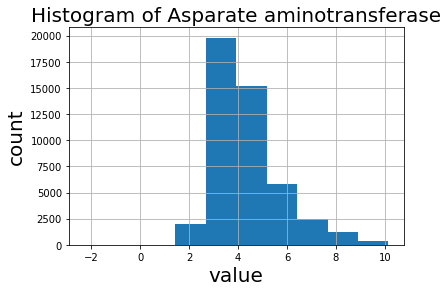

In [62]:
for k in selected_aggregators:
    tmp = np.array(selected_aggregators[k])
    tmp = tmp[tmp >= lowerbound_dict[k]]
    tmp = tmp[tmp <= upperbound_dict[k]]
    plot_hist_simple(tmp, title='Histogram of {}'.format(k), xlabel='value', ylabel='count')
    
#     if np.sum(tmp < 0) != 0:
#         print('%s has negative value!')

#     plot_hist_simple(np.log(0.1 + tmp[tmp > 0]), 
#                      title='Histogram of {} after log-transform'.format(k),
#                      xlabel='log-value', ylabel='count')

In [63]:
selected_idx_to_feature_name

{3: 'Anion gap',
 8: 'Bicarbonate',
 11: 'Blood urea nitrogen',
 13: 'Calcium (total)',
 15: 'Chloride (blood)',
 19: 'Creatine kinase',
 20: 'Creatinine (blood)',
 22: 'Diastolic blood pressure',
 26: 'Glascow coma scale total',
 27: 'Glucose (blood)',
 29: 'Heart Rate',
 30: 'Hematocrit',
 31: 'Hemoglobin',
 40: 'Magnesium',
 41: 'Mean blood pressure',
 42: 'Mean corpuscular hemoglobin',
 52: 'Phosphate',
 53: 'Platelets',
 55: 'Potassium',
 57: 'Prothrombin time',
 58: 'Red blood cell count (blood)',
 60: 'Sodium',
 61: 'Systolic blood pressure',
 62: 'Temperature (C)',
 67: 'White blood cell count (blood)',
 12: 'CO2 (ETCO2, PCO2, etc.)',
 49: 'Oxygen saturation',
 50: 'Partial pressure of carbon dioxide',
 51: 'Partial thromboplastin time',
 70: 'pH (blood)',
 10: 'Bilirubin (total)',
 33: 'Lactate',
 35: 'Lactic acid',
 54: 'Positive end-expiratory pressure',
 25: 'Fraction inspired oxygen',
 14: 'Calcium ionized',
 0: 'Alanine aminotransferase',
 2: 'Alkaline phosphate',
 4: 'As

In [64]:
selected_feature_name_to_idx = {selected_idx_to_feature_name[k]: i  
                                for i, k in enumerate(selected_idx_to_feature_name)}

In [65]:
selected_feature_name_to_idx

{'Anion gap': 0,
 'Bicarbonate': 1,
 'Blood urea nitrogen': 2,
 'Calcium (total)': 3,
 'Chloride (blood)': 4,
 'Creatine kinase': 5,
 'Creatinine (blood)': 6,
 'Diastolic blood pressure': 7,
 'Glascow coma scale total': 8,
 'Glucose (blood)': 9,
 'Heart Rate': 10,
 'Hematocrit': 11,
 'Hemoglobin': 12,
 'Magnesium': 13,
 'Mean blood pressure': 14,
 'Mean corpuscular hemoglobin': 15,
 'Phosphate': 16,
 'Platelets': 17,
 'Potassium': 18,
 'Prothrombin time': 19,
 'Red blood cell count (blood)': 20,
 'Sodium': 21,
 'Systolic blood pressure': 22,
 'Temperature (C)': 23,
 'White blood cell count (blood)': 24,
 'CO2 (ETCO2, PCO2, etc.)': 25,
 'Oxygen saturation': 26,
 'Partial pressure of carbon dioxide': 27,
 'Partial thromboplastin time': 28,
 'pH (blood)': 29,
 'Bilirubin (total)': 30,
 'Lactate': 31,
 'Lactic acid': 32,
 'Positive end-expiratory pressure': 33,
 'Fraction inspired oxygen': 34,
 'Calcium ionized': 35,
 'Alanine aminotransferase': 36,
 'Alkaline phosphate': 37,
 'Asparate am

## Normalize features 

In [68]:
def normalize(Ys, ind_fs, ind_ts):
    new_Ys, new_ind_fs, new_ind_ts = [], [], []

    for Y, ind_f, ind_t in zip(Ys, ind_fs, ind_ts):
        new_Y, new_ind_f, new_ind_t = [], [], []
        
        for idx, (theY, the_ind_f, the_ind_t) in enumerate(zip(Y, ind_f, ind_t)):
            if not the_ind_f in selected_idx_to_feature_name:
                continue
            elif theY < 0:
                continue
                
            feature_name = selected_idx_to_feature_name[the_ind_f]

            theY = np.log(0.1 + theY)
                
            
            if theY < lowerbound_dict[feature_name] or theY > upperbound_dict[feature_name]:
                continue

            theY = (theY - mean_dict[feature_name]) / std_dict[feature_name]
            
            new_Y.append(theY)
            new_ind_f.append(selected_feature_name_to_idx[feature_name])
            new_ind_t.append(the_ind_t)
            
        new_Ys.append(new_Y)
        new_ind_fs.append(new_ind_f)
        new_ind_ts.append(new_ind_t)
        
    return new_Ys, new_ind_fs, new_ind_ts

In [69]:
norm_Ys, norm_ind_fs, norm_ind_ts = normalize(Ys, ind_fs, ind_ts)

In [70]:
data_dict = {
    'icustay_ids': icustay_ids,
    'Ts': Ts,
    'Ys': norm_Ys,
    'ind_ts': norm_ind_ts,
    'ind_fs': norm_ind_fs,
    'all_labels': all_labels,
    'all_rel_end_time': all_rel_end_time,
    'selected_feature_name_to_idx': selected_feature_name_to_idx,
    'selected_idx_to_feature_name': selected_idx_to_feature_name
}

pickle.dump(data_dict, open('../data/in_hospital_mortality_181111/norm_time_var_features.pkl', 'wb'))

In [71]:
len(data_dict['Ts'][1])

21

In [72]:
max(data_dict['ind_ts'][1])

20

In [74]:
selected_feature_name_to_idx

{'Anion gap': 0,
 'Bicarbonate': 1,
 'Blood urea nitrogen': 2,
 'Calcium (total)': 3,
 'Chloride (blood)': 4,
 'Creatine kinase': 5,
 'Creatinine (blood)': 6,
 'Diastolic blood pressure': 7,
 'Glascow coma scale total': 8,
 'Glucose (blood)': 9,
 'Heart Rate': 10,
 'Hematocrit': 11,
 'Hemoglobin': 12,
 'Magnesium': 13,
 'Mean blood pressure': 14,
 'Mean corpuscular hemoglobin': 15,
 'Phosphate': 16,
 'Platelets': 17,
 'Potassium': 18,
 'Prothrombin time': 19,
 'Red blood cell count (blood)': 20,
 'Sodium': 21,
 'Systolic blood pressure': 22,
 'Temperature (C)': 23,
 'White blood cell count (blood)': 24,
 'CO2 (ETCO2, PCO2, etc.)': 25,
 'Oxygen saturation': 26,
 'Partial pressure of carbon dioxide': 27,
 'Partial thromboplastin time': 28,
 'pH (blood)': 29,
 'Bilirubin (total)': 30,
 'Lactate': 31,
 'Lactic acid': 32,
 'Positive end-expiratory pressure': 33,
 'Fraction inspired oxygen': 34,
 'Calcium ionized': 35,
 'Alanine aminotransferase': 36,
 'Alkaline phosphate': 37,
 'Asparate am

In [75]:
selected_idx_to_feature_name

{3: 'Anion gap',
 8: 'Bicarbonate',
 11: 'Blood urea nitrogen',
 13: 'Calcium (total)',
 15: 'Chloride (blood)',
 19: 'Creatine kinase',
 20: 'Creatinine (blood)',
 22: 'Diastolic blood pressure',
 26: 'Glascow coma scale total',
 27: 'Glucose (blood)',
 29: 'Heart Rate',
 30: 'Hematocrit',
 31: 'Hemoglobin',
 40: 'Magnesium',
 41: 'Mean blood pressure',
 42: 'Mean corpuscular hemoglobin',
 52: 'Phosphate',
 53: 'Platelets',
 55: 'Potassium',
 57: 'Prothrombin time',
 58: 'Red blood cell count (blood)',
 60: 'Sodium',
 61: 'Systolic blood pressure',
 62: 'Temperature (C)',
 67: 'White blood cell count (blood)',
 12: 'CO2 (ETCO2, PCO2, etc.)',
 49: 'Oxygen saturation',
 50: 'Partial pressure of carbon dioxide',
 51: 'Partial thromboplastin time',
 70: 'pH (blood)',
 10: 'Bilirubin (total)',
 33: 'Lactate',
 35: 'Lactic acid',
 54: 'Positive end-expiratory pressure',
 25: 'Fraction inspired oxygen',
 14: 'Calcium ionized',
 0: 'Alanine aminotransferase',
 2: 'Alkaline phosphate',
 4: 'As